In [19]:
from pathlib import Path as pth
import yfinance as yf
import pandas as pd




In [40]:
tw0050 = yf.download('0050.TW', start = '1993-01-01')
tw0050.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

C:\Users\say08\AppData\Local\Temp\ipykernel_8624\1522614042.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tw0050 = yf.download('0050.TW', start = '1993-01-01')
[*********************100%***********************]  1 of 1 completed


In [41]:
# tw0050.resample('W')['Close'].last() # 每周
# tw0050.resample('ME')['Close'].last() # 每月月底
# tw0050.resample('MS')['Close'].last() # 每月月初

(tw0050.resample('W').agg(
    Open = ('Open', 'first'),
    High = ('High', 'max'),
    Low = ('Low', 'min'),
    Close = ('Close', 'last')
))

,Open,High,Low,Close
Date,,,,
2009-01-04,20.756760,20.756760,20.756760,20.756760
2009-01-11,22.209158,23.105863,19.045448,20.346292
2009-01-18,19.973722,21.956573,18.944408,18.944408
2009-01-25,19.860057,21.299831,18.950724,19.260149
2009-02-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2025-10-26,62.349998,63.650002,61.750000,62.349998
2025-11-02,63.750000,64.800003,63.200001,64.750000
2025-11-09,64.449997,64.849998,62.299999,62.549999


In [31]:
tw0050['Close_t1'] = tw0050['Close'].shift(-1) # 明天的
tw0050['Close_t2'] = tw0050['Close'].shift(-2) # 後天的
tw0050['Close_t-1'] = tw0050['Close'].shift(1) # 昨天的
tw0050[['Close', 'Close_t1', 'Close_t2', 'Close_t-1']]

,Close,Close_t1,Close_t2,Close_t-1
Date,,,,
2009-01-02,20.756754,23.105869,23.093237,NaN
2009-01-05,23.105869,23.093237,20.339979,20.756754
2009-01-06,23.093237,20.339979,19.045444,23.105869
2009-01-07,20.339979,19.045444,20.346292,23.093237
2009-01-08,19.045444,20.346292,21.590311,20.339979
...,...,...,...,...
2025-11-14,61.700001,61.900002,60.450001,62.900002
2025-11-17,61.900002,60.450001,60.049999,61.700001
2025-11-18,60.450001,60.049999,61.799999,61.900002


## 移動平均

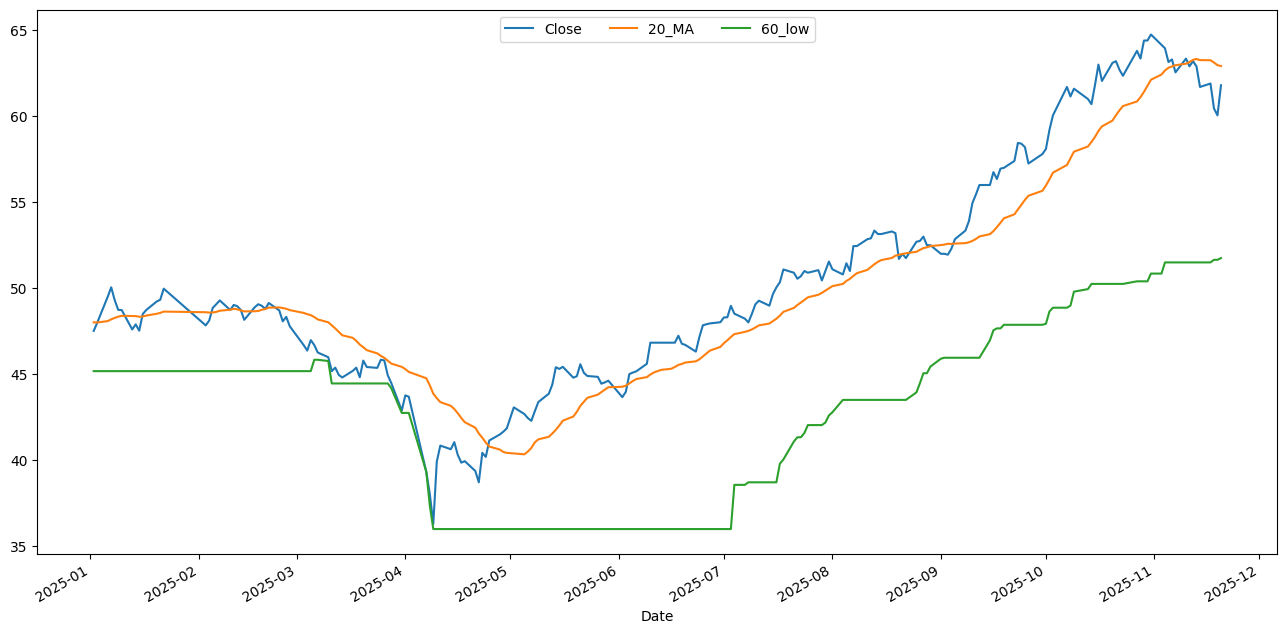

In [ ]:
tw0050['3MA'] = tw0050['Close'].rolling(3).mean()
tw0050


# 課堂練習  請將收盤價繪製價格折線圖，並且繪製20日MA，以及60日的價格最低點
tw0050['20_MA'] = tw0050['Close'].rolling(20).mean()
tw0050['60_low'] = tw0050['Low'].rolling(60).min()

import matplotlib.pyplot as plt

plt.figure(figsize = (16, 8))
tw0050.loc['2025']['Close'].plot(x = tw0050.index)
tw0050.loc['2025']['20_MA'].plot(x = tw0050.index)
tw0050.loc['2025']['60_low'].plot(x = tw0050.index)
plt.legend(loc = 'upper center', ncol = 3)
plt.show()

In [76]:
data1 = yf.download('0050.TW', start = '2024-01-01', end = '2024-12-31')
print(data1.index)
data2 = yf.download('0050.TW', start = '2025-01-01', end = '2025-11-20')
print(data2.index)
data = pd.concat([data1, data2], axis = 0)
data.index

C:\Users\say08\AppData\Local\Temp\ipykernel_8624\2348425248.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('0050.TW', start = '2024-01-01', end = '2024-12-31')
[*********************100%***********************]  1 of 1 completed
C:\Users\say08\AppData\Local\Temp\ipykernel_8624\2348425248.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data2 = yf.download('0050.TW', start = '2025-01-01', end = '2025-11-20')
[*********************100%***********************]  1 of 1 completed

DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-15',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=241, freq=None)
DatetimeIndex(['2025-01-02', '2025-01-03', '2025-01-06', '2025-01-07',
               '2025-01-08', '2025-01-09', '2025-01-10', '2025-01-13',
               '2025-01-14', '2025-01-15',
               ...
               '2025-11-06', '2025-11-07', '2025-11-10', '2025-11-11',
               '2025-11-12', '2025-11-13', '2025-11-14', '2025-11-17',
               '2025-11-18', '2025-11-19'],
              dtype='datetime64[ns]', name='Date', length=214, freq=None)


DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-15',
               ...
               '2025-11-06', '2025-11-07', '2025-11-10', '2025-11-11',
               '2025-11-12', '2025-11-13', '2025-11-14', '2025-11-17',
               '2025-11-18', '2025-11-19'],
              dtype='datetime64[ns]', name='Date', length=455, freq=None)

In [69]:
pd.concat([data1, data2], axis = 1)

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,0050.TW,0050.TW,0050.TW,0050.TW,0050.TW,0056.TW,0056.TW,0056.TW,0056.TW,0056.TW
Date,,,,,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,11.544791,11.544791,11.544791,11.544791,0
2008-01-03,NaN,NaN,NaN,NaN,NaN,11.333659,11.333659,11.333659,11.333659,0
2008-01-04,NaN,NaN,NaN,NaN,NaN,11.459440,11.459440,11.459440,11.459440,0
2008-01-07,NaN,NaN,NaN,NaN,NaN,11.162959,11.162959,11.162959,11.162959,0
2008-01-08,NaN,NaN,NaN,NaN,NaN,11.401042,11.401042,11.401042,11.401042,0
...,...,...,...,...,...,...,...,...,...,...
2025-11-14,61.700001,61.900002,61.400002,61.650002,204108022.0,36.130001,36.310001,36.020000,36.160000,100385476
2025-11-17,61.900002,62.200001,61.799999,62.000000,86927813.0,35.790001,36.099998,35.740002,36.099998,110559844
